In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from itertools import cycle

class Lasso:
    def __init__(self):
        self.res = None
        self.type = None
        self.alpha = None
    
    # lasso with parameter selected using cross validation
    # tail_num is the first and last number of coefficients to plot
    def Lasso_cv(self, X, y, n_alps=100, alps=None, plot=True, tail_num = 5):
        X['intercept'] = 1
        lasso = linear_model.LassoCV(n_alphas = n_alps, alphas = alps)
        self.type = 'LassoCV'
        res = lasso.fit(X,y)
        self.res = res
        coefs = pd.Series(res.coef_, index = X.columns)
        print("Lasso picked " + str(sum(coefs != 0)) + " variables and eliminated the other " +  str(sum(coefs == 0)) + " variables")
        # get residuals 
        preds = pd.DataFrame({"preds":self.res.predict(X), "true":y})
        preds["residuals"] = preds["true"] - preds["preds"]
        # get best alpha
        self.alpha = res.alpha_
        print("Lasso picked the best penalty parameter",self.alpha)
        # plot results if plot==True
        if plot:
            imp_coef = pd.concat([coefs.sort_values().head(tail_num),
                         coefs.sort_values().tail(tail_num)])
            plt.figure(figsize=(8, 6), dpi=100)
            imp_coef.plot(kind = "barh")
            plt.title("Coefficients in the Lasso Model")
            plt.show()
            # plot residuals
            plt.figure(figsize=(8, 6), dpi=100)
            preds.plot(x = "true", y = "residuals",kind = "scatter")
            plt.title("True values versus residuals")
            plt.show()
    
    # compute lasso path and plot coefficients along the path
    def Lasso_path(self, X, y, alphs=None):
        X['intercept'] = 1
        alphs, path, _ = linear_model.lasso_path(X, y, alphas=alphs)
        self.type = 'Lasso_path'
        self.res = path
        coefs = path
        plt.figure(figsize=(8, 6), dpi=100)
        colors = cycle(['b', 'r', 'g', 'c', 'k'])
        for coef_l, c in zip(coefs, colors):
            plt.plot(-np.log(alphs), coef_l, c=c)
        plt.xlabel('-Log(alpha)')
        plt.ylabel('coefficients')
        plt.title('Coefficients along the path of Lasso')
        plt.axis('tight')
        plt.show()
    
    # plain lasso
    def plain_Lasso(self, X, y, alp, plot=True, tail_num=5):
        X['intercept'] = 1
        lasso = linear_model.Lasso(alpha=alp)
        self.res = lasso.fit(X, y)
        # get coefficients
        coefs = pd.Series(self.res.coef_, index = X.columns)
        print("Lasso picked " + str(sum(coefs != 0)) + " variables and eliminated the other " +  str(sum(coefs == 0)) + " variables")
        # get residuals 
        preds = pd.DataFrame({"preds":self.res.predict(X), "true":y})
        preds["residuals"] = preds["true"] - preds["preds"]
        # plot results if plot==True
        if plot:
            imp_coef = pd.concat([coefs.sort_values().head(tail_num),
                         coefs.sort_values().tail(tail_num)])
            plt.figure(figsize=(8, 6), dpi=100)
            imp_coef.plot(kind = "barh")
            plt.title("Coefficients in the Lasso Model")
            plt.show()
            # plot residuals
            plt.figure(figsize=(8, 6), dpi=100)
            preds.plot(x = "true", y = "residuals",kind = "scatter")
            plt.title("True values versus residuals")
            plt.show()

In [2]:
crime = pd.read_csv('data/crime.csv', encoding='unicode_escape', parse_dates=['OCCURRED_ON_DATE'])
reg_data = crime.groupby('REPORTING_AREA').mean()
reg_data['NUM'] = crime.REPORTING_AREA.value_counts()
reg_data.head(10)

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,NUM
REPORTING_AREA,,,,,,,
,2703.949679,2016.727259,6.581630,13.019062,31.473326,-53.521609,20250
000,2504.846154,2016.538462,5.692308,14.615385,-1.000000,-1.000000,13
1,1831.666667,2016.527778,5.833333,11.416667,42.390174,-70.996649,36
10,2434.190476,2016.539683,6.544974,12.597884,42.388733,-71.008466,189
100,1847.119318,2016.477273,6.204545,11.889205,42.357794,-71.054888,352
101,1724.076923,2016.594747,6.754221,9.093809,42.357173,-71.054407,533
102,1791.964716,2016.572289,6.389845,14.253012,42.356418,-71.061459,1162
103,1725.298561,2016.534173,6.634892,11.892086,42.356782,-71.060137,556
104,1715.704545,2016.525974,6.720779,13.827922,42.356308,-71.058944,308


In [3]:
cols = ['YEAR','MONTH','HOUR','Lat']
X = reg_data[cols]
y = reg_data['NUM']

# Lasso with a pre-fixed penalty alpha

/Users/Momooo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lasso picked 4 variables and eliminated the other 1 variables


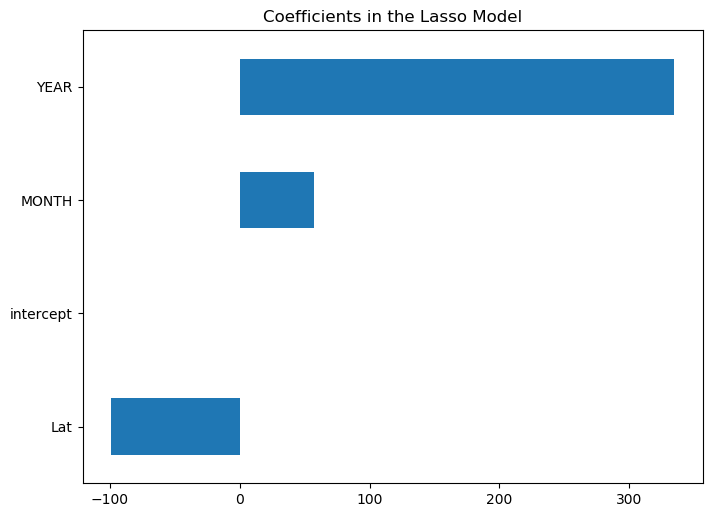

<Figure size 800x600 with 0 Axes>

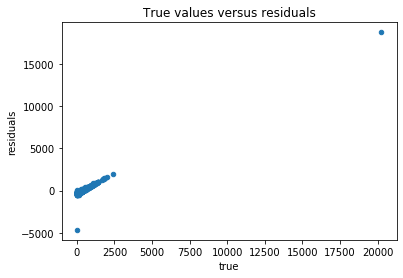

In [4]:
lasso = Lasso()
lasso.plain_Lasso(X, y, alp=0.05, plot=True, tail_num=2)

# Lasso with cross-validation to find the best penalty

/Users/Momooo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lasso picked 3 variables and eliminated the other 2 variables
Lasso picked the best penalty parameter 5.625073180508718


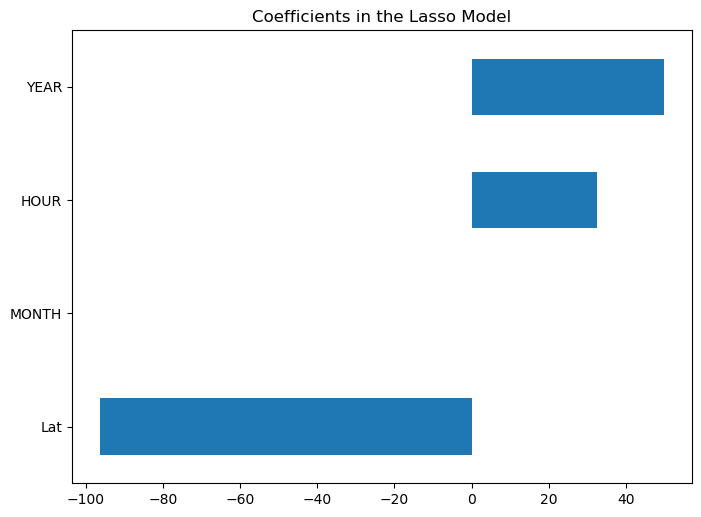

<Figure size 800x600 with 0 Axes>

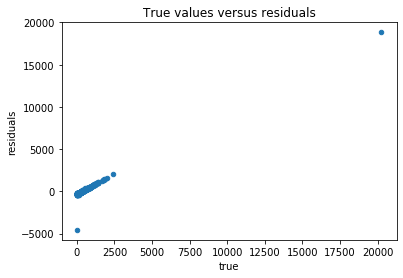

In [5]:
lasso.Lasso_cv(X,y, n_alps = 100, alps=None, plot=True, tail_num=2)
best_alpha = lasso.alpha

## fit using the best alpha

/Users/Momooo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lasso picked 3 variables and eliminated the other 2 variables


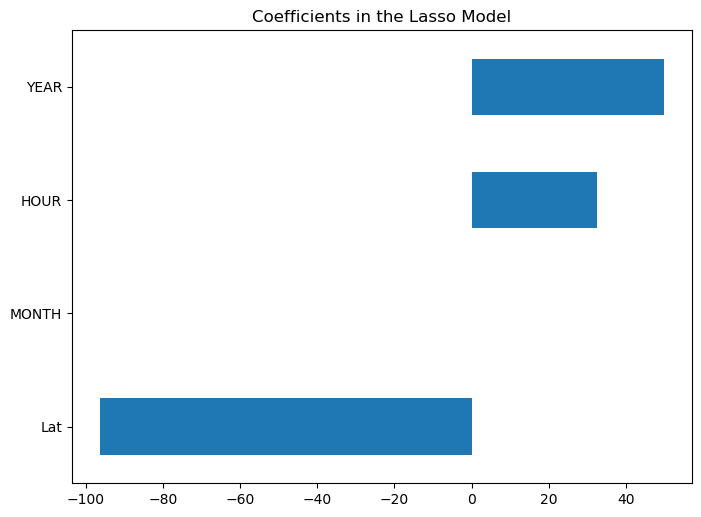

<Figure size 800x600 with 0 Axes>

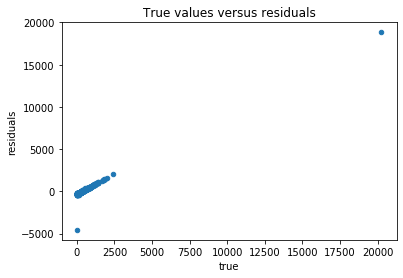

In [7]:
blasso = Lasso()
blasso.plain_Lasso(X, y, alp=best_alpha, plot=True, tail_num=2)

# Lasso path: coefficients along a series of alpha

/Users/Momooo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


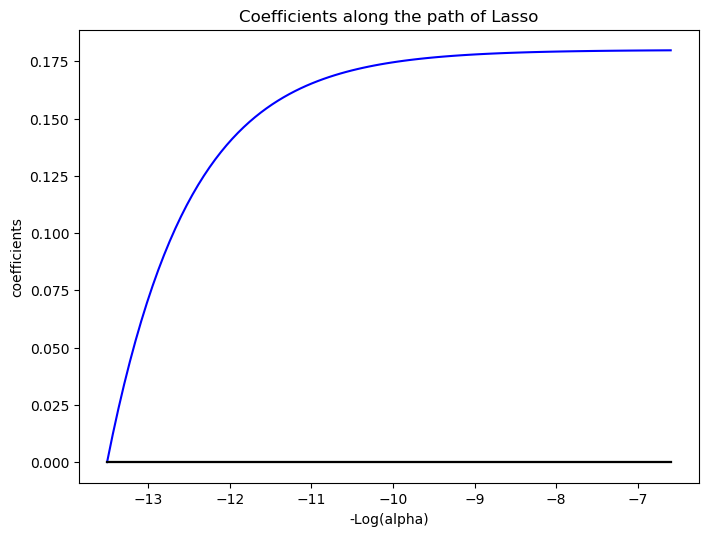

In [9]:
ls = Lasso()
ls.Lasso_path(X, y, alphs = None)